# Introduction

The following analysis will look at two datasets: `species_info` and `observations` which looks at data on various species in national parks across the US. The goals of my analysis are as follows:

- What is the distribution of species? What types of species are at the most risk?

- Which species are observed the most? What is the distribution acorss parks for these species

- Create a function that filters the data based on an input keyword like `bear` and return information on observations etc.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Explore the Data

In [2]:
species=pd.read_csv('species_info.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [3]:
obser=pd.read_csv('observations.csv')
obser.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


### Species Dataset

Lets first explore the `species` data to prepare it for analysis

In [4]:
print(species.shape)


(5824, 4)


In [5]:
print(f'The number of unique species is: {species.scientific_name.nunique()}')
print(f'The number of unique categorys is: {species.category.nunique()}')
print(f'The unique categorys are: {species.category.unique()}')
print(f'The number of unique conservation status are: {species.conservation_status.nunique()}')
print(f'The unique conservation status are: {species.conservation_status.unique()}')


The number of unique species is: 5541
The number of unique categorys is: 7
The unique categorys are: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']
The number of unique conservation status are: 4
The unique conservation status are: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [6]:
print(species.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None


There are a lot of null conservation_status values. However, when looking further into the data, we can see these are species that are not at risk. Therefore, we can fill these values with "Not at Risk"

In [7]:
species.conservation_status.fillna('Not at Risk',inplace=True)
#Now lets check the other columns for '' blank values
print(species[species.scientific_name == ''])
print(species[species.common_names == ''])


Empty DataFrame
Columns: [category, scientific_name, common_names, conservation_status]
Index: []
Empty DataFrame
Columns: [category, scientific_name, common_names, conservation_status]
Index: []


Lets look at the data by grouping key columns

In [8]:
species.groupby('category').size()
#We see that vascular plant is the most common species type

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

In [9]:
species.groupby('conservation_status').size()
#We see that there are few species in recovery

conservation_status
Endangered              16
In Recovery              4
Not at Risk           5633
Species of Concern     161
Threatened              10
dtype: int64

### Observations Dataset

In [10]:
obser.head(3)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138


In [11]:
print(obser.shape)

(23296, 3)


In [12]:
print(f'The number of unique parks are: {obser.park_name.nunique()}')
print(f'The unique parks are: {obser.park_name.unique()}')

The number of unique parks are: 4
The unique parks are: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [13]:
print(obser.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None


In [14]:
#There appears to be no null values but lets check for ''
print(obser[obser.scientific_name == ''])
print(obser[obser.park_name == ''])

Empty DataFrame
Columns: [scientific_name, park_name, observations]
Index: []
Empty DataFrame
Columns: [scientific_name, park_name, observations]
Index: []


In [15]:
print(obser.park_name.value_counts())
#We see that there are equal number of observations across each park

Great Smoky Mountains National Park    5824
Yosemite National Park                 5824
Bryce National Park                    5824
Yellowstone National Park              5824
Name: park_name, dtype: int64


In [16]:
#Lets quickly look at the most observed species
print(obser.groupby('scientific_name').observations.sum().sort_values(ascending=False).head())
#This is not that useful without the common names. I will merge the tables later in the analysis

scientific_name
Streptopelia decaocto    1785
Holcus lanatus           1780
Castor canadensis        1725
Hypochaeris radicata     1720
Puma concolor            1711
Name: observations, dtype: int64


# Analysis

## 1. Species Distribution

In [17]:
species.head(3)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not at Risk
1,Mammal,Bos bison,"American Bison, Bison",Not at Risk
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Not at Risk


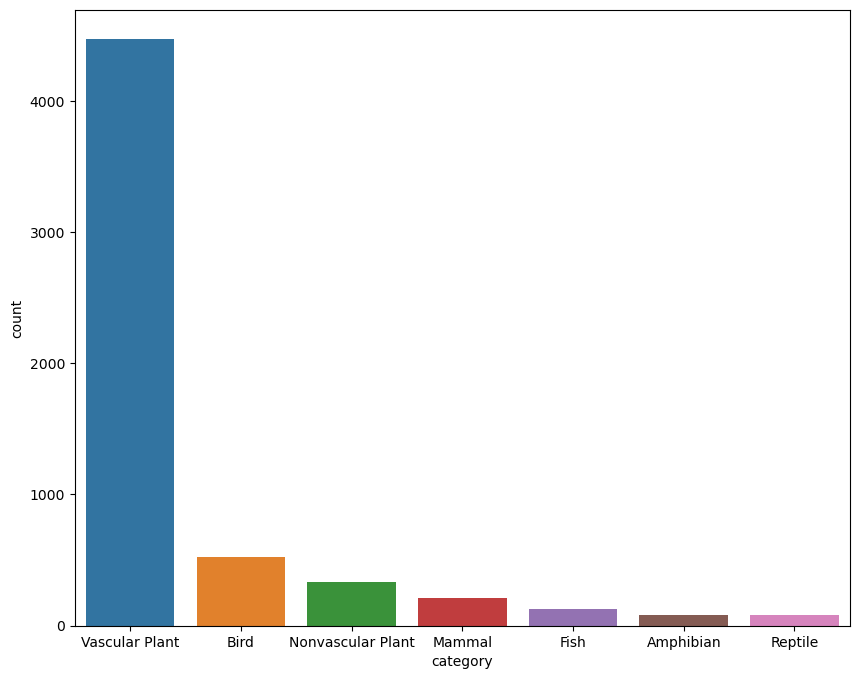

In [18]:
# Lets first look at the distribution of species
plt.figure(figsize=(10,8))
sns.countplot(x=species.category, order=species.category.value_counts().index)
plt.show()
plt.close()
#There is alot of Vascular plant species. Lets drill down and look at species at risk 

In [19]:
species_risk_count = species[species.conservation_status!='Not at Risk'].groupby(['conservation_status','category']).scientific_name.count().reset_index()
#Creating a pivot table to make it easier to visualize the data
species_risk_count= species_risk_count.pivot(columns='conservation_status',index='category',values='scientific_name').fillna(0)
#Re ordering the table for plotting purposes
column_order=['Species of Concern','Threatened','Endangered', 'In Recovery']
species_risk_count= species_risk_count.reindex(column_order,axis=1).sort_values(by='Species of Concern',ascending=False)
species_risk_count

conservation_status,Species of Concern,Threatened,Endangered,In Recovery
category,,,,
Bird,72.0,0.0,4.0,3.0
Vascular Plant,43.0,2.0,1.0,0.0
Mammal,28.0,2.0,7.0,1.0
Nonvascular Plant,5.0,0.0,0.0,0.0
Reptile,5.0,0.0,0.0,0.0
Amphibian,4.0,2.0,1.0,0.0
Fish,4.0,4.0,3.0,0.0


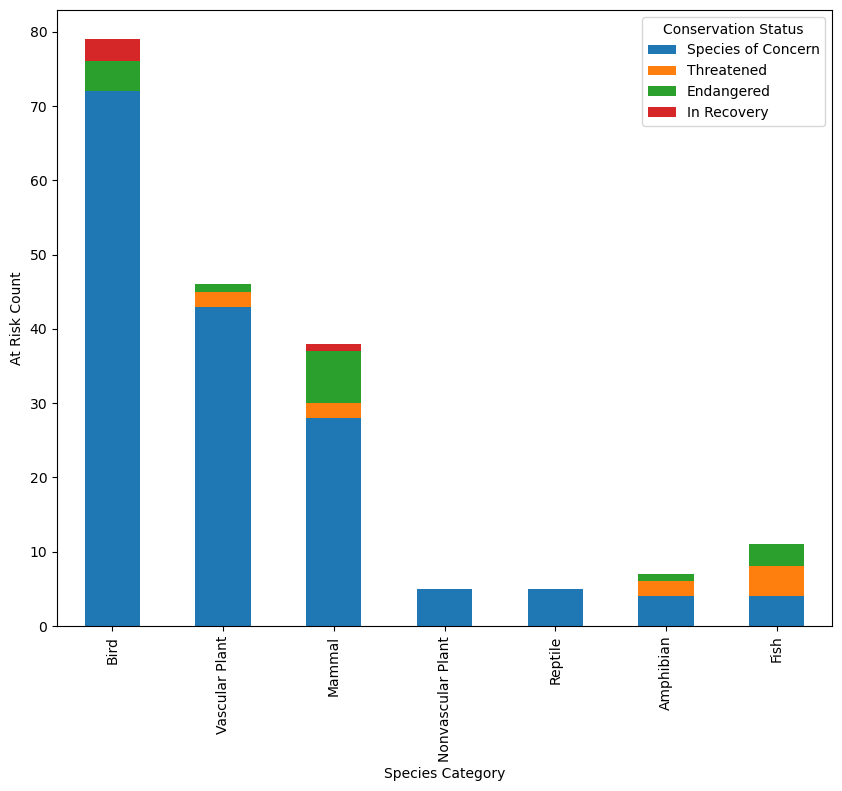

In [20]:
species_risk_count.plot.bar(stacked=True,figsize=(10,8))
plt.xlabel('Species Category')
plt.ylabel('At Risk Count')
plt.legend(title='Conservation Status')
plt.show()
plt.close()

This plot shows that birds followed by vascular plants and mammals are the most at risk species. However, the first plot showed that vascular plants are the most common. Hence, it will be useful to look at proprtions

In [21]:
species_risk_count_prop = species[species.conservation_status!='Not at Risk'].groupby(['conservation_status','category']).scientific_name.count().reset_index()
species_risk_count_prop['prop']=0
list_hold=[]
#I could have used normalize=True. At the time I did not realize this was possibld
for i in range(species_risk_count_prop.shape[0]):
    cat=species_risk_count_prop.category[i]
    num=sum(1 for i in species.category if i == cat)
    list_hold.append(round(species_risk_count_prop.scientific_name[i]/num*100,2))

species_risk_count_prop['prop']=list_hold 
    
species_risk_count_prop= species_risk_count_prop.pivot(columns='conservation_status',index='category',values='prop').fillna(0)
column_order=['Species of Concern','Threatened','Endangered', 'In Recovery']
species_risk_count_prop= species_risk_count_prop.reindex(column_order,axis=1).sort_values(by='Species of Concern',ascending=False)
species_risk_count_prop


conservation_status,Species of Concern,Threatened,Endangered,In Recovery
category,,,,
Bird,13.82,0.00,0.77,0.58
Mammal,13.08,0.93,3.27,0.47
Reptile,6.33,0.00,0.00,0.00
Amphibian,5.00,2.50,1.25,0.00
Fish,3.15,3.15,2.36,0.00
Nonvascular Plant,1.50,0.00,0.00,0.00
Vascular Plant,0.96,0.04,0.02,0.00


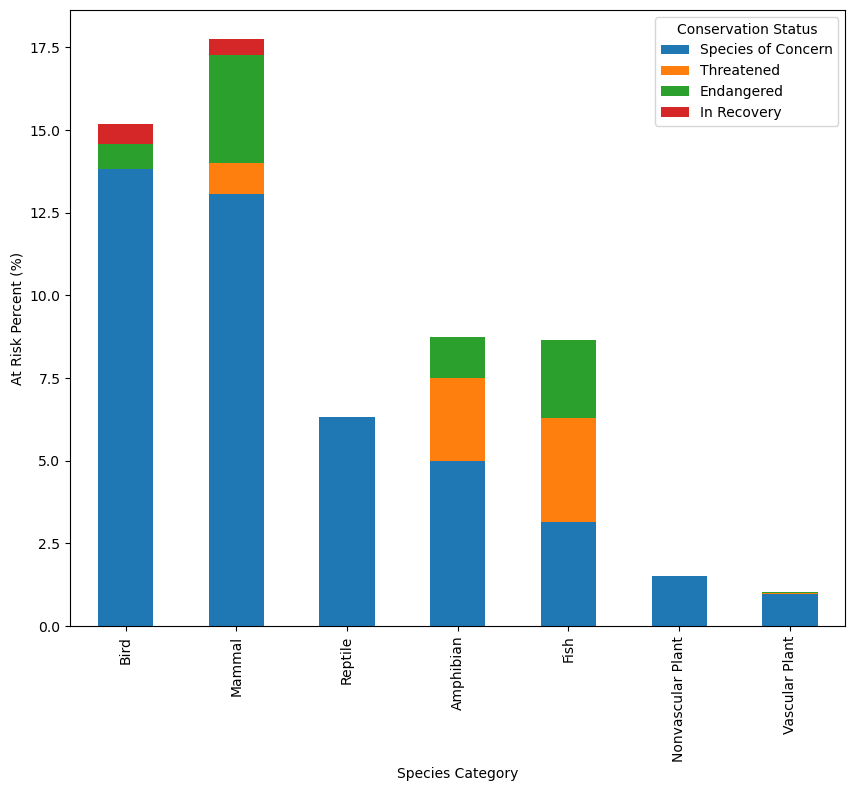

In [22]:
species_risk_count_prop.plot.bar(stacked=True,figsize=(10,8))
plt.xlabel('Species Category')
plt.ylabel('At Risk Percent (%)')
plt.legend(title='Conservation Status')
plt.show()
plt.close()

We see that mammals are actually the most at risk species, with ~17.5 of species observed in the 4 national parks at risk. Now lets drill down further and see if mammals statistically need more protection than other species. We can do this with a chi2 test

To simplify the analysis, I will assume all species that are at risk are also protected.

In [23]:
species['is_protected']=species.conservation_status != 'Not at Risk'

count_protected= species.groupby(['category','is_protected']).scientific_name.count().reset_index()
count_protected=count_protected.pivot(index='category',columns='is_protected',values='scientific_name').reset_index()
count_protected.rename(columns={False:'Not Protected',True:'Is Protected'},inplace=True)
count_protected

is_protected,category,Not Protected,Is Protected
0,Amphibian,73,7
1,Bird,442,79
2,Fish,116,11
3,Mammal,176,38
4,Nonvascular Plant,328,5
5,Reptile,74,5
6,Vascular Plant,4424,46


In [24]:
#Again, lets add a percent protected. We can produce a similar stacked bar chart as the last one
count_protected['percent_protected']=round(100*count_protected['Is Protected']/(count_protected['Is Protected']+count_protected['Not Protected']),2)

count_protected
#Again, we see that mamamls are the most protected species

is_protected,category,Not Protected,Is Protected,percent_protected
0,Amphibian,73,7,8.75
1,Bird,442,79,15.16
2,Fish,116,11,8.66
3,Mammal,176,38,17.76
4,Nonvascular Plant,328,5,1.50
5,Reptile,74,5,6.33
6,Vascular Plant,4424,46,1.03


In [25]:
#Lets look if one species needs statistically more protection than another. I have limited stats knowledge so I will do a chi test
from scipy.stats import chi2_contingency as chi
#Lets build an algorithm that will check all relationships
pval_list=[]
for i in range(count_protected.shape[0]):
    #Reversed lets us iterate backwards through the list
    for j in reversed(range(count_protected.shape[0])):

        pval=chi([[count_protected['Is Protected'][i],count_protected['Not Protected'][i]],[count_protected['Is Protected'][j],count_protected['Not Protected'][j]]])[1]
        #Create a list with each species category and the pval
        pval_list.append([count_protected.category[i] , count_protected.category[j],pval])


pval_list_clean=[]
hold_list=[]
i=0
#Need to iterate through the list of pval's and keep only significant results and remove duplicates
while i < len(pval_list):
    if pval_list[i][2] < 0.05:
        if pval_list[i][2] not in hold_list:
            hold_list.append(pval_list[i][2])
            pval_list_clean.append(pval_list[i])
    i+=1

#Now lets print out the results
for i in range(len(pval_list_clean)):
    print(f'{pval_list_clean[i][0]} needs statistically more protection than {pval_list_clean[i][1]}')


Amphibian needs statistically more protection than Vascular Plant
Amphibian needs statistically more protection than Nonvascular Plant
Bird needs statistically more protection than Vascular Plant
Bird needs statistically more protection than Nonvascular Plant
Fish needs statistically more protection than Vascular Plant
Fish needs statistically more protection than Nonvascular Plant
Fish needs statistically more protection than Mammal
Mammal needs statistically more protection than Vascular Plant
Mammal needs statistically more protection than Reptile
Mammal needs statistically more protection than Nonvascular Plant
Mammal needs statistically more protection than Fish
Nonvascular Plant needs statistically more protection than Reptile
Nonvascular Plant needs statistically more protection than Mammal
Reptile needs statistically more protection than Vascular Plant
Vascular Plant needs statistically more protection than Bird


We see that mammals statistically need the most protection. This complements the chart showing that proportionally they are the most at risk species

## 2. Most Observed Species and their Distributions

The first step is to look at the the common names from `species` to get an idea of the most prevalent animals in the dataset. The data will be need to be split up into individual names. 

In [26]:
from itertools import chain
import string
#Create a function to remove punctuation in the common names
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_Names = species[species.category == "Mammal"].common_names.apply(remove_punctuations).str.split().tolist()

common_Names[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

The next step is to clean up duplicate words in each row since they should no be counted more than once per species. We can do this because dictionaries cant have repeat keys

In [27]:
cleanRows = []

for item in common_Names:
    item = list(dict.fromkeys(item))
    cleanRows.append(item)
    
cleanRows[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

Now I will collaspe the words into a single list using the chain interative function

In [28]:
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))
res[:6]

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison', 'Aurochs']

In [29]:
words_counted = []

for i in res:
    x = res.count(i)
    words_counted.append((i,x))
#Create a Df with the results
pd.DataFrame(set(words_counted), columns =['Word', 'Count']).sort_values("Count", ascending = False).head(10)

,Word,Count
203,Bat,23
63,Shrew,18
29,Myotis,17
24,Mouse,16
106,Chipmunk,13
58,Squirrel,12
53,American,12
132,Vole,11
143,Eastern,11
100,Mountain,10


We see that the most prevelant species in the park are bats. However, lets still look at what species are observed the most

In [30]:
#Merge species with obser on key equal to scientific name
merged_df=pd.merge(obser,species)
merged_df.head()

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not at Risk,False
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not at Risk,False
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not at Risk,False
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not at Risk,False
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,Not at Risk,False


In [31]:
merged_count=merged_df.groupby(['common_names','category','conservation_status']).observations.sum().reset_index().sort_values('observations',ascending=False)
merged_count.head()

,common_names,category,conservation_status,observations
1733,Dicranum Moss,Nonvascular Plant,Not at Risk,4008
774,Brachythecium Moss,Nonvascular Plant,Not at Risk,3910
3672,Panic Grass,Vascular Plant,Not at Risk,3543
904,Bryum Moss,Nonvascular Plant,Not at Risk,3477
4662,Sphagnum,Nonvascular Plant,Not at Risk,3476


The most observed species are plants, all which are not at risk.

What about the least observed?

In [32]:
merged_count=merged_df.groupby(['common_names','category','conservation_status']).observations.sum().reset_index().sort_values('observations',ascending=True)
merged_count.head()

,common_names,category,conservation_status,observations
5323,Whooping Crane,Bird,Endangered,131
4001,Red Wolf,Mammal,Endangered,137
363,"Bachman's Warbler, Bachman's Wood Warbler",Bird,Endangered,141
4560,Smoky Madtom,Fish,Endangered,143
4421,Sierra Nevada Yellow-Legged Frog,Amphibian,Endangered,144


The least observed are all endagered species, and a combination of birds, mammals, fish, and amphibians

## 3. Function to filter data and return information on keyword like `bear`

### Testing

Now, lets build an algorithm to take in a keyword like 'bat' and analyze all observations for that subset of species and other information on what species are at risk.

The first step will be to simplify the list of common names for each species into single names and then remove duplicates. We will have to remove punctionation from the common names variable to do this

In [33]:
keyword='bat'
#Can use regex (normal expressions) to select only common names that contain the keyword
species['is_keyword'] = species.common_names.str.contains(r'\b{}\b'.format(keyword), regex = True, case=False)
species[species.is_keyword]

,category,scientific_name,common_names,conservation_status,is_protected,is_keyword
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,Not at Risk,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",Not at Risk,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,Not at Risk,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,Not at Risk,False,True


In [34]:
#Now lets get the species category of the keyword
counts_keyword=species.groupby('category').is_keyword.sum().reset_index()
cat=counts_keyword.loc[counts_keyword.is_keyword.idxmax()].category
counts_keyword


,category,is_keyword
0,Amphibian,0
1,Bird,0
2,Fish,0
3,Mammal,23
4,Nonvascular Plant,0
5,Reptile,0
6,Vascular Plant,0


In [35]:
#Now we need to drop all columns that are not this species type
new_species=species.drop(species[species.category != cat].index)

In [36]:
#Now we can merge the species table with the observations tabld
keyword_observations=obser.merge(new_species[new_species.is_keyword])
keyword_observations.drop_duplicates(subset='observations',keep='first',inplace=True)
keyword_observations.head()

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_keyword
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,Not at Risk,False,True


In [37]:
keyword_observations['common_names']=keyword_observations['common_names'].apply(lambda x: x.split(',')[0])
keyword_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_keyword
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,Not at Risk,False,True
...,...,...,...,...,...,...,...,...
137,Myotis sodalis,Great Smoky Mountains National Park,14,Mammal,Indiana Bat,Endangered,True,True
138,Myotis sodalis,Bryce National Park,27,Mammal,Indiana Bat,Endangered,True,True
139,Myotis sodalis,Yellowstone National Park,68,Mammal,Indiana Bat,Endangered,True,True
140,Myotis leibii,Yosemite National Park,132,Mammal,Eastern Small-Footed Bat,Species of Concern,True,True


In [38]:
#Now lets create a table with the species and their conservation status
keyword_species_info=keyword_observations.groupby(['common_names','conservation_status']).observations.sum().reset_index()
keyword_species_info

,common_names,conservation_status,observations
0,Big Brown Bat,Species of Concern,777
1,Canyon Bat,Not at Risk,429
2,Eastern Red Bat,Not at Risk,678
3,Eastern Small-Footed Bat,Species of Concern,181
4,Evening Bat,Not at Risk,562
5,Hoary Bat,Not at Risk,938
6,Indiana Bat,Endangered,145
7,Little Brown Bat,Species of Concern,1356
8,Mexican Free-Tailed Bat,Not at Risk,574
9,Mule-Eared Bat,Not at Risk,1211


In [39]:
keyword_observations_count=keyword_observations.groupby('park_name').observations.sum().reset_index()

keyword_observations_count

,park_name,observations
0,Bryce National Park,1860
1,Great Smoky Mountains National Park,1330
2,Yellowstone National Park,5305
3,Yosemite National Park,2428


In [40]:
keyword_observations_count=keyword_observations.groupby(['park_name','is_protected']).observations.sum().reset_index().sort_values('observations')
keyword_observations_count_pivot=keyword_observations_count.pivot(index='park_name',columns='is_protected',values='observations')
keyword_observations_count_pivot

is_protected,False,True
park_name,,
Bryce National Park,891,969
Great Smoky Mountains National Park,816,514
Yellowstone National Park,2812,2493
Yosemite National Park,1514,914


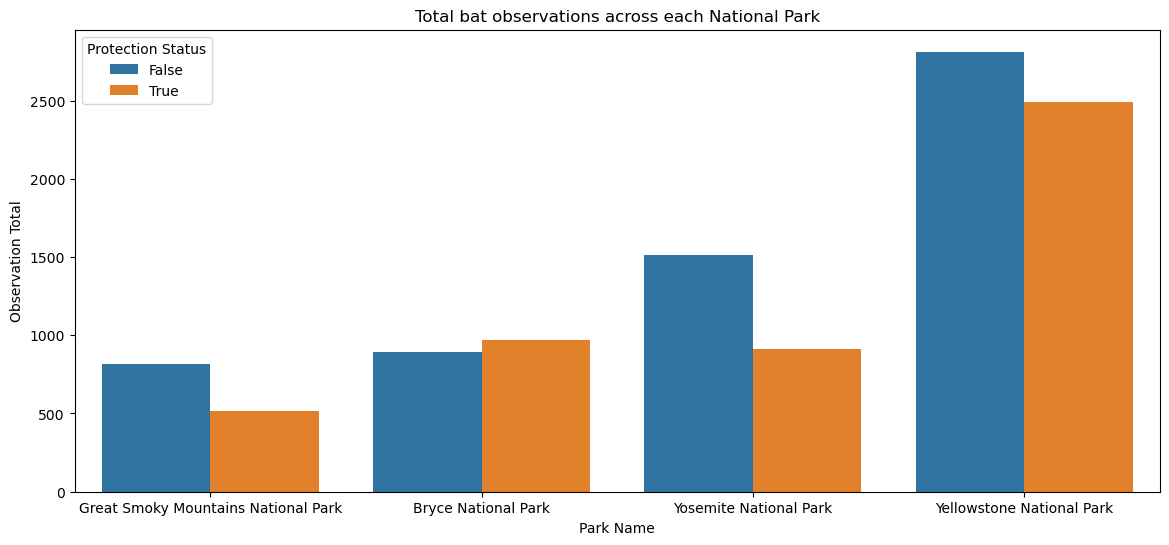

In [41]:
plt.figure(figsize=(14,6))
sns.barplot(x=keyword_observations_count.park_name,y=keyword_observations_count.observations,hue=keyword_observations_count.is_protected)
plt.legend(title='Protection Status')
plt.xlabel('Park Name')
plt.title(f"Total {keyword} observations across each National Park")
plt.ylabel('Observation Total')
plt.show()
plt.close()

### The Function

In [42]:
def species_information(keyword):
    #First I will create a new column that is true if the keyword is in the common name
    species['is_keyword'] = species.common_names.str.contains(r'\b{}\b'.format(keyword), regex = True, case=False)

    #Next, I will group the dataframe by category
    counts_keyword=species.groupby('category').is_keyword.sum().reset_index()

    #Because of the complexity of the plant names, to get the keyword category I will find the max value
    num_species=counts_keyword.loc[counts_keyword.is_keyword.idxmax()].is_keyword
    cat=counts_keyword.loc[counts_keyword.is_keyword.idxmax()].category
    print(f'The species you inputted is a {cat}')
    print(f'The number of species that match the input is {num_species}\n')

    #Now I will drop all rows that are not the category 
    new_species=species.drop(species[species.category != cat].index)
    #Now i will merge with the observations table
    keyword_observations=obser.merge(new_species[new_species.is_keyword])
    keyword_observations.drop_duplicates(subset='observations',keep='first',inplace=True)
    keyword_observations['common_names']=keyword_observations['common_names'].apply(lambda x: x.split(',')[0])

    #Now lets create a table with the species and their conservation status
    keyword_species_info=keyword_observations.groupby(['common_names','conservation_status']).observations.sum().reset_index()
    print(keyword_species_info)
    print()

    #Next I will group the new df by park and then by protection status
    keyword_observations_count_1=keyword_observations.groupby(['park_name','common_names']).observations.sum().reset_index().sort_values('observations',ascending=False).fillna(0)
    keyword_observations_count_pivot_1=keyword_observations_count_1.pivot(index='common_names',columns='park_name',values='observations').fillna(0)
    print(keyword_observations_count_1)
    print()
    print(keyword_observations_count_pivot_1)
    print()

    #I will create a pivot table to make it easy to understand the information
    keyword_observations_count=keyword_observations.groupby(['park_name','is_protected']).observations.sum().reset_index().sort_values('observations').fillna(0)
    keyword_observations_count_pivot=keyword_observations_count.pivot(index='park_name',columns='is_protected',values='observations').fillna(0)
    print(keyword_observations_count_pivot)

    #Finally, I will plot the result
    plt.figure(figsize=(14,6))
    sns.barplot(x=keyword_observations_count.park_name,y=keyword_observations_count.observations,hue=keyword_observations_count.is_protected)
    plt.legend(title='Protection Status')
    plt.title(f"Total {keyword} observations across each National Park")
    plt.xlabel('Park Name')
    plt.ylabel('Observation Total')
    plt.show()
    plt.close()

    #Plot for each species
    if len(keyword_species_info)>=4:
        num_cols=4
    else:
        num_cols=len(keyword_species_info)

    #Lets wrap the text for the xlabels
    import textwrap 
    wrap_func = lambda x: textwrap.fill(x, width=3,break_long_words=False)
    keyword_observations['park_name_wrap']=keyword_observations.park_name.apply(wrap_func)
    keyword_observations_count_1=keyword_observations.groupby(['park_name_wrap','common_names']).observations.sum().reset_index().sort_values('observations',ascending=False).fillna(0)

    plots=sns.FacetGrid(keyword_observations_count_1,col_wrap=num_cols,hue='common_names',col='common_names',sharey=True,sharex=False,aspect=2,height=4)
    plots=plots.map(sns.barplot,'park_name_wrap','observations').add_legend().set_axis_labels('Park Name','Total Observations')
    
    plt.xticks(rotation=45)
    plt.show()
    plt.close()
    


The species you inputted is a Mammal
The number of species that match the input is 6

            common_names conservation_status  observations
0              Black Fox         Not at Risk           540
1        Common Gray Fox         Not at Risk          1199
2   Eastern Fox Squirrel         Not at Risk           478
3                Red Fox         Not at Risk           550
4  Sierra Nevada Red Fox         Not at Risk           628

                              park_name           common_names  observations
10            Yellowstone National Park        Common Gray Fox           454
15               Yosemite National Park        Common Gray Fox           336
13            Yellowstone National Park  Sierra Nevada Red Fox           294
12            Yellowstone National Park                Red Fox           258
11            Yellowstone National Park   Eastern Fox Squirrel           254
1                   Bryce National Park        Common Gray Fox           247
9             Yellow

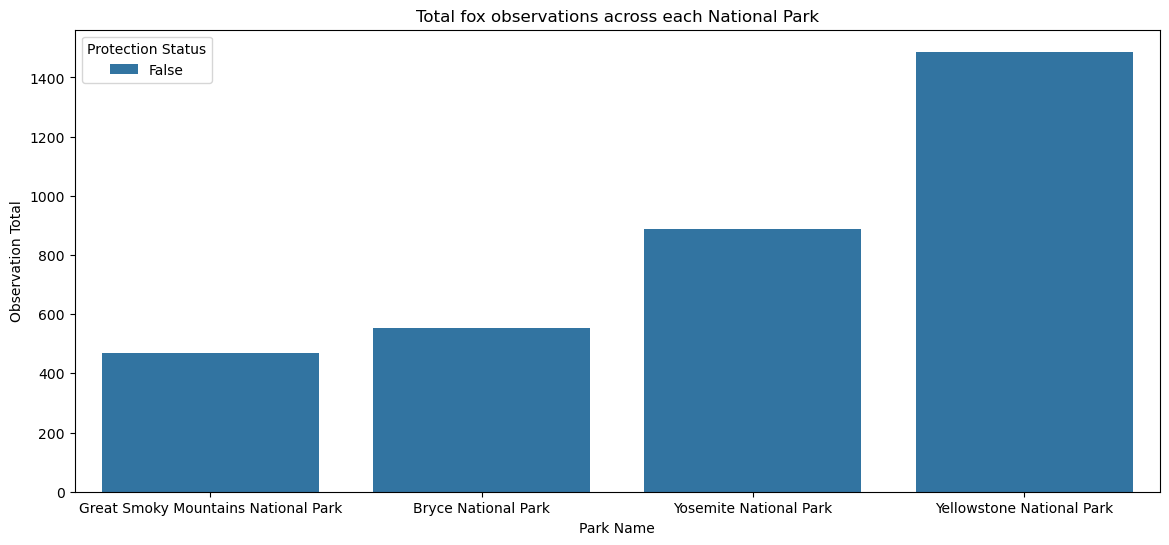

c:\Users\eobri\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


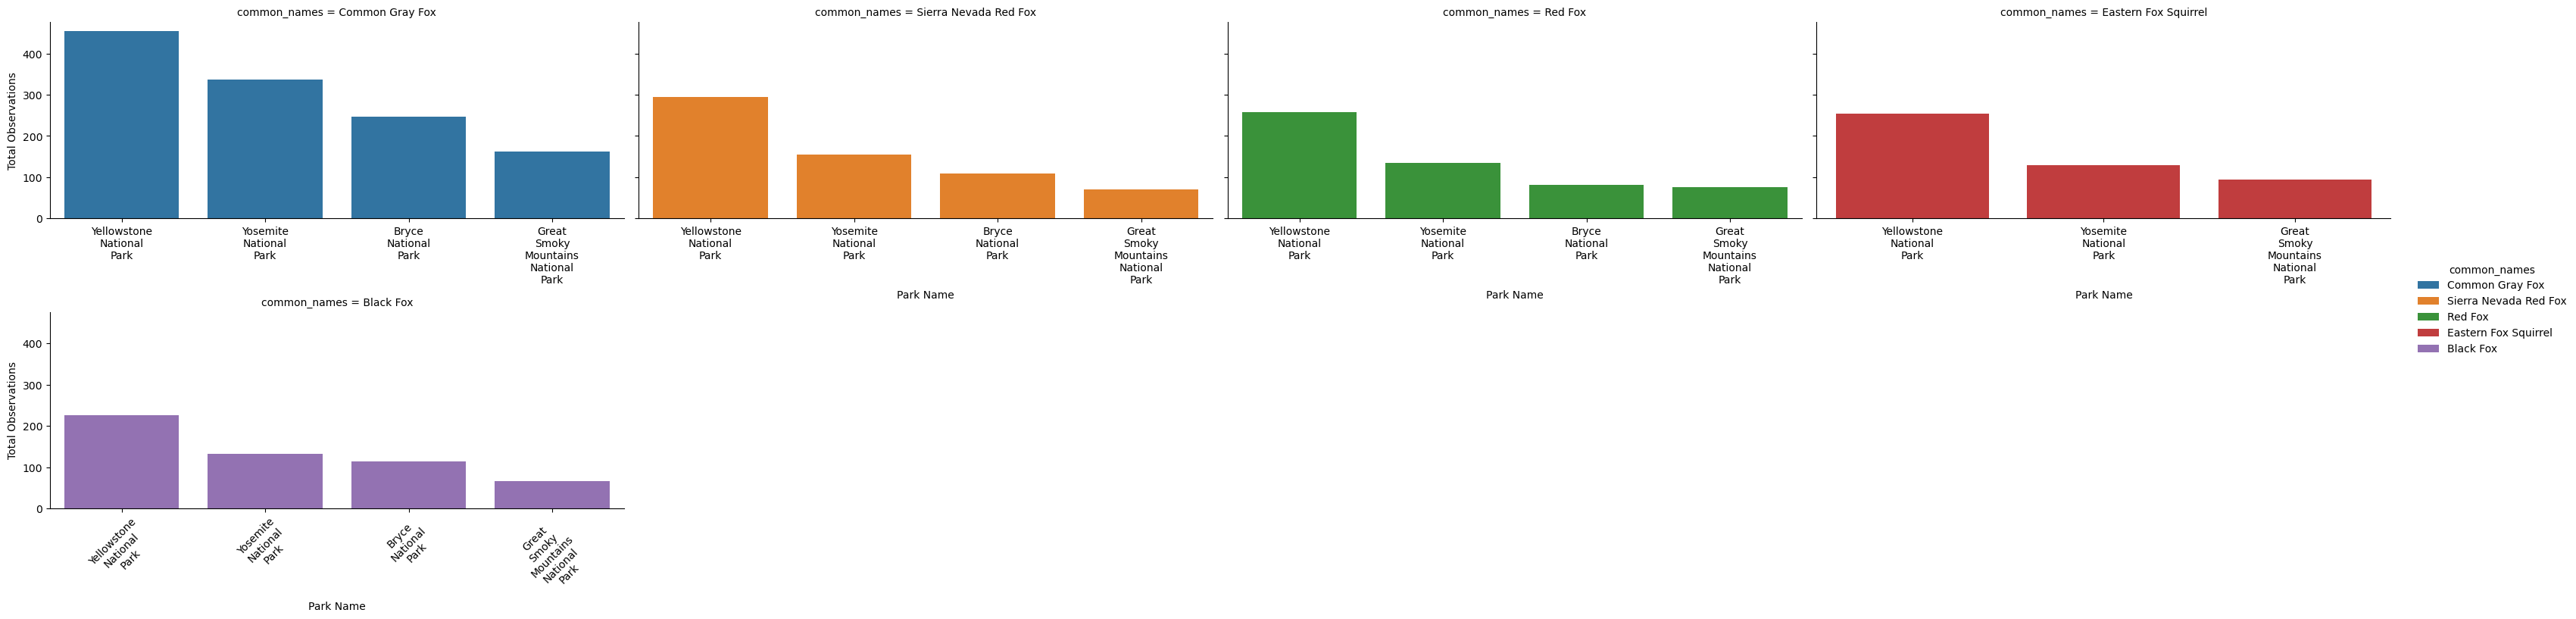

In [45]:
species_information('fox')